In [1]:
import pandas as pd
df = pd.read_csv('Dataset.csv')
df.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [2]:
df.shape

(383, 17)

In [3]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [4]:
df.duplicated().sum()

19

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [8]:
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [9]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Smoking History', 'Radiotherapy History',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Types of Thyroid Cancer (Pathology)', 'Focality', 'Risk', 'Tumor',
       'Lymph Nodes', 'Cancer Metastasis', 'Stage', 'Treatment Response',
       'Recurred'],
      dtype='object')

In [10]:
categorical_features = df.select_dtypes(include = ['object','category']).columns.to_list()
print(f'Total Categorical features = {len(categorical_features)}\n')

Total Categorical features = 16



In [11]:
df.describe()

for col in categorical_features:
  print(f'Frequency for {col}')
  print(df[col].value_counts())
  print()

Frequency for Gender
Gender
F    293
M     71
Name: count, dtype: int64

Frequency for Smoking
Smoking
No     315
Yes     49
Name: count, dtype: int64

Frequency for Smoking History
Smoking History
No     336
Yes     28
Name: count, dtype: int64

Frequency for Radiotherapy History
Radiotherapy History
No     357
Yes      7
Name: count, dtype: int64

Frequency for Thyroid Function
Thyroid Function
Euthyroid                      313
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

Frequency for Physical Examination
Physical Examination
Multinodular goiter            135
Single nodular goiter-right    127
Single nodular goiter-left      88
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

Frequency for Adenopathy
Adenopathy
No           258
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Na

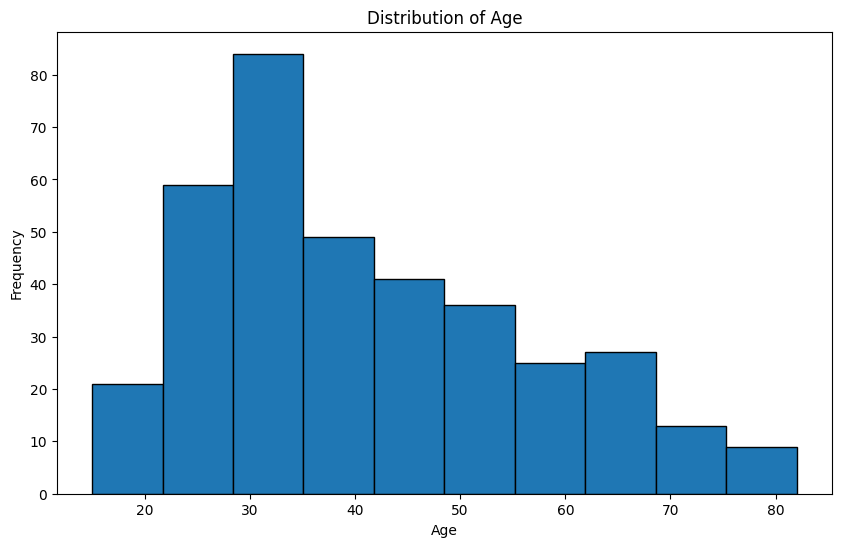

In [12]:
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  plt.figure(figsize=(10, 6))
  plt.hist(df[col], bins=10, edgecolor='black')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

<ipython-input-13-58769d19f425>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tumor', y='Age', data=df, palette="OrRd", ax=axes[0])
<ipython-input-13-58769d19f425>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y='Age', data=df,palette="OrRd", ax=axes[1])


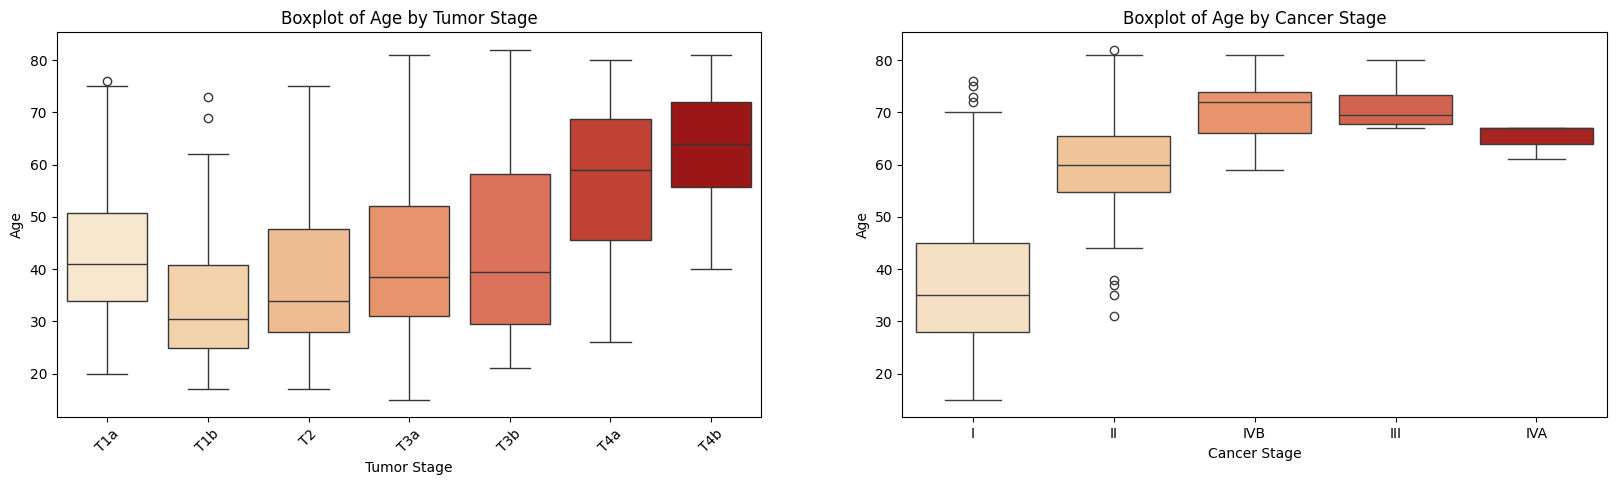

In [13]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Boxplot for Tumor
sns.boxplot(x='Tumor', y='Age', data=df, palette="OrRd", ax=axes[0])
axes[0].set_title('Boxplot of Age by Tumor Stage')
axes[0].set_xlabel('Tumor Stage')
axes[0].set_ylabel('Age')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for Stage
sns.boxplot(x='Stage', y='Age', data=df,palette="OrRd", ax=axes[1])
axes[1].set_title('Boxplot of Age by Cancer Stage')
axes[1].set_xlabel('Cancer Stage')
axes[1].set_ylabel('Age')
axes[1].tick_params(axis='x', rotation=0)
plt.show()

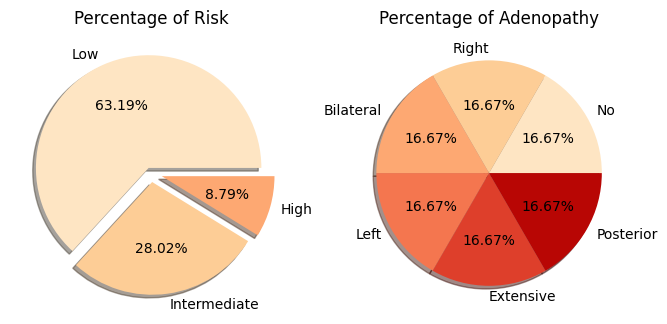

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("OrRd")
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for 'Risk'
risky = df['Risk'].value_counts()
risky.plot(kind='pie', autopct='%0.2f%%', explode=[0.05, 0.08, 0.1], labels=risky.index, shadow=True, ax=axes[0])
axes[0].set_title('Percentage of Risk')
axes[0].set_ylabel('')

# Pie chart for 'Adenopathy'
aden = df['Adenopathy'].value_counts()
aden.value_counts().plot(kind='pie', autopct='%0.2f%%', labels=aden.index, shadow=True, ax=axes[1])
axes[1].set_title('Percentage of Adenopathy')
axes[1].set_ylabel('')

plt.show()

<ipython-input-15-bccd48f27c65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='OrRd', ax=axes[0])
<ipython-input-15-bccd48f27c65>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking', data=df, palette='BuPu', ax=axes[1])
<ipython-input-15-bccd48f27c65>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Treatment Response', data=df, palette='GnBu', ax=axes[2])


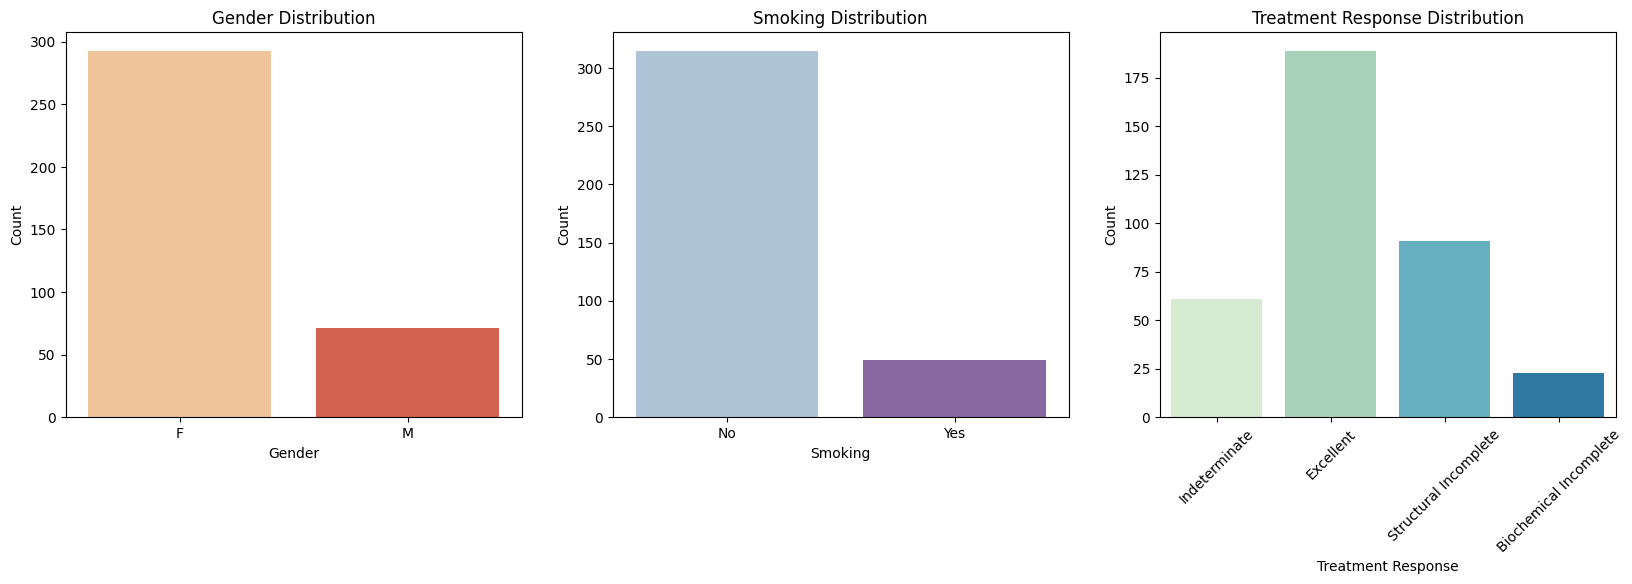

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Count of patients in each gender category.
sns.countplot(x='Gender', data=df, palette='OrRd', ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Count of patients in each smoking category.
sns.countplot(x='Smoking', data=df, palette='BuPu', ax=axes[1])
axes[1].set_title('Smoking Distribution')
axes[1].set_xlabel('Smoking')
axes[1].set_ylabel('Count')

# Count of patients in each treatment response category.
sns.countplot(x='Treatment Response', data=df, palette='GnBu', ax=axes[2])
axes[2].set_title('Treatment Response Distribution')
axes[2].set_xlabel('Treatment Response')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
plt.show()

     1.From the above plot we conclude that the majority of people who has a thyroid Cancer are Female

     2.The Smoking doesnt affect on the thyroid cancer

     3.Rate of recovery from the Thyroid cancer are very large

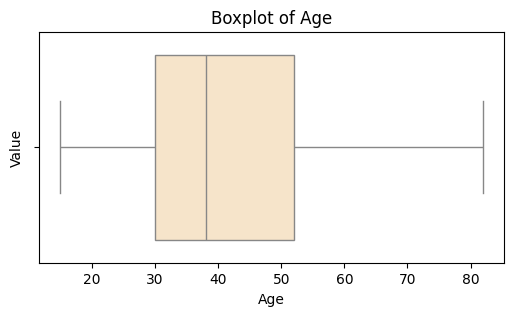

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(6, 3))
sns.boxplot(x=df['Age'], ax=axes)
axes.set_title('Boxplot of Age')
axes.set_xlabel('Age')
axes.set_ylabel('Value')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in categorical_features:
  encoder.fit(df[col])
  df[col] = encoder.transform(df[col])
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


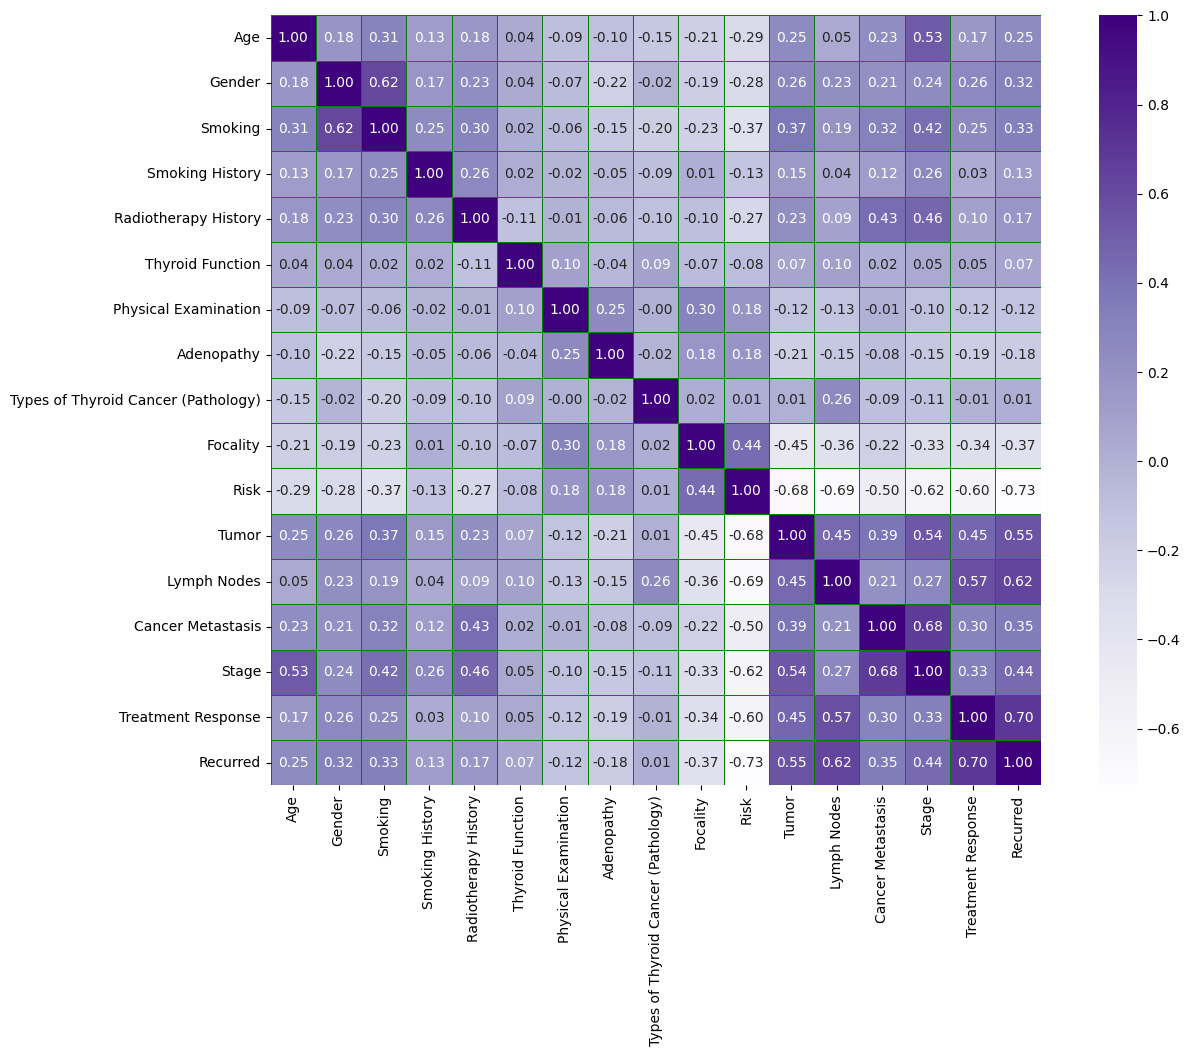

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, fmt=".2f", square=True, ax=ax, cmap='Purples',annot=True, linecolor='Green', linewidths=0.70)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('Recurred', axis=1)
y = df['Recurred']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (273, 16)
y_train shape: (273,)
X_test shape: (91, 16)
y_test shape: (91,)


DecisionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9451


              precision    recall  f1-score   support

           0     0.9355    0.9831    0.9587        59
           1     0.9655    0.8750    0.9180        32

    accuracy                         0.9451        91
   macro avg     0.9505    0.9290    0.9384        91
weighted avg     0.9460    0.9451    0.9444        91



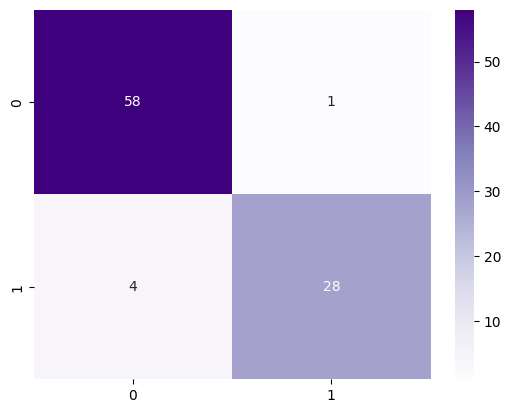

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, digits=4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', linecolor='Green')
plt.show()

XGBClassifier

XGBoost Accuracy: 0.9451
              precision    recall  f1-score   support

           0     0.9655    0.9492    0.9573        59
           1     0.9091    0.9375    0.9231        32

    accuracy                         0.9451        91
   macro avg     0.9373    0.9433    0.9402        91
weighted avg     0.9457    0.9451    0.9452        91



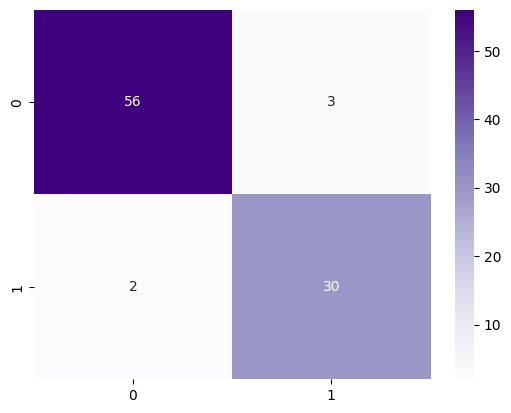

In [32]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')

print(classification_report(y_test, y_pred_xgb, digits=4))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, cmap='Purples', fmt='g')
plt.show()

RandomForestClassifier

Random Forest Accuracy: 0.9670
              precision    recall  f1-score   support

           0     0.9667    0.9831    0.9748        59
           1     0.9677    0.9375    0.9524        32

    accuracy                         0.9670        91
   macro avg     0.9672    0.9603    0.9636        91
weighted avg     0.9670    0.9670    0.9669        91



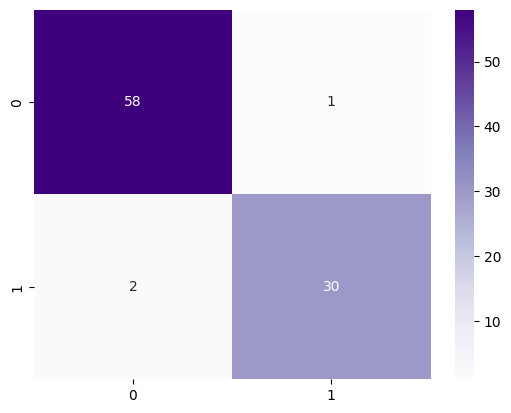

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion='entropy', max_depth=4)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(classification_report(y_test, y_pred_rf, digits=4))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Purples', fmt='g')
plt.show()

GradientBoostingClassifier

GBM Accuracy: 0.9451
              precision    recall  f1-score   support

           0     0.9355    0.9831    0.9587        59
           1     0.9655    0.8750    0.9180        32

    accuracy                         0.9451        91
   macro avg     0.9505    0.9290    0.9384        91
weighted avg     0.9460    0.9451    0.9444        91



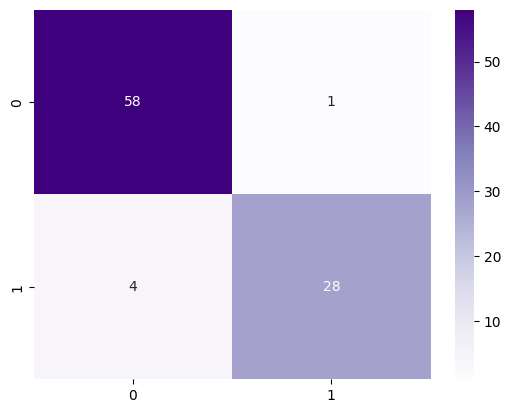

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=70)
gbm_clf.fit(X_train, y_train)
y_pred_gbm = gbm_clf.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'GBM Accuracy: {accuracy_gbm:.4f}')
print(classification_report(y_test, y_pred_gbm, digits=4))

cm_gbm = confusion_matrix(y_test, y_pred_gbm)
sns.heatmap(cm_gbm, annot=True, cmap='Purples', fmt='g')
plt.show()

Heperparameter for Best Model


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
best_rf_clf = RandomForestClassifier(**best_params)
best_rf_clf.fit(X_train, y_train)

y_pred_best_rf = best_rf_clf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Random Forest Accuracy with Best Parameters: {accuracy_best_rf:.4f}')

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9743589743589745
Random Forest Accuracy with Best Parameters: 0.9670


Random Forest Accuracy: 0.9670
              precision    recall  f1-score   support

           0     0.9667    0.9831    0.9748        59
           1     0.9677    0.9375    0.9524        32

    accuracy                         0.9670        91
   macro avg     0.9672    0.9603    0.9636        91
weighted avg     0.9670    0.9670    0.9669        91



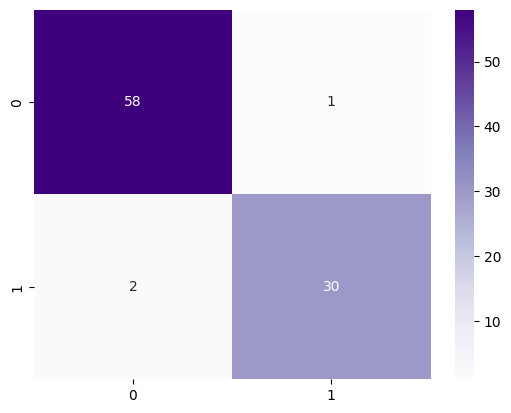

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    criterion='entropy'
)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(classification_report(y_test, y_pred_rf, digits=4))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Purples', fmt='g')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse:.4f}')

Mean Squared Error: 0.0330
